In [4]:
# Parameters
MSA_MARKET = "Denver"
BRAND_MSA = "Denver, CO"


In [5]:
import pandas as pd
import datetime as dt
import numpy as np
from snowflake.connector.pandas_tools import write_pandas
import snowflake.connector
import os



In [6]:
# Import the function from your external script
from IOS_query import run_snowflake_query

# Run the query and get the results as a DataFrame
ios_df = run_snowflake_query()

# Display the DataFrame
ios_df.head()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNRb9sgFIX%2FisWebcCxnQYlqdJG1aK1S5am07Y3DDhlxZBycd3%2B%2B5GkkTpNrbQ3dDkHvnsPjM%2BfW5M8KQ%2Fa2QmiGUGJssJJbbcTdLe5Ss9QAoFbyY2zaoJeFKDz6Rh4a3Zs1oV7u1aPnYKQxIMssMPGBHXeMsdBA7O8VcCCYLezm2uWZ4TtvAtOOIPeWD52cADlQyQ8WSToiHcfwo5h3Pd91g8y57c4J4RgMsJRtZd8OumfY0%2Fv6CkmxV4fFVG%2BemW70PY4go%2Bw6qMI2OfNZpWulrcblMxOqJfOQtcqf6v8kxbqbn19BIBI8LuD0Dv%2FAGnLtc3Aur4x%2FEEJ1%2B66EI%2FM4go3SmLjtjp2vZhP0O5By2K5NA39Acuzx1K%2BfBm1y2d9v4HHm%2FLntWnWzcWIL7mivp5%2FEyj5foo138e6AOjUwu7DDLFE8iKlNM3zDSEsP2MFzYoB%2FYWSeQxTWx4Ozn%2BIM2FcJyOtV1wIBXBAFdKmYqvxsYQBHN6niuWwqAWpasFLXjdVVQ2HnFacUlXlg1INSUO4GJYNUUWVCyEVHw3rshZ1KXg9Gg3Q8aWxA7uf%

/Users/lmola/Documents/Luis_Projects/OOH/prod/testing/IOS_query.py:185: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(io_query, conn)


,IOS,ACCOUNT_ID,ID_FRM_ACCTS,BILLINGCITY,BILLINGSTATE,BILLINGCOUNTRY,BILLINGZIP,IO_YYYYQQ,IO_WEEK_OF_QTR,IO_QUARTER,...,INBOUND_EXCLUSION_FLAG,OWNER,OPPORTUNITY_ID,QL_REFERRER_NAME,QL_REFERRER_ROLE,QL_SOURCED_BY_NAME,QL_SOURCED_BY_ROLE,OPPORTUNITY_SOURCED_BY_NAME,OPPORTUNITY_SOURCED_BY_ROLE,DEMAND_CHANNEL
0,0066S00000zLgI2QAK,0016S000030r6NFQAY,0016S000030r6NFQAY,Dover,DE,Canada,19901,20223,2022-02-21,3,...,Include,Self Service,None,None,None,None,None,None,None,None
1,006PJ0000086jacYAA,001PJ000008J43LYAS,001PJ000008J43LYAS,None,NC,US,27409,20244,2024-03-18,4,...,Include,MRA,None,None,None,None,None,None,None,None
2,0066S000012cDzIQAU,0016S000038078WQAQ,0016S000038078WQAQ,St. Louis,MO,None,63112,20231,2022-06-13,1,...,Include,MRA,None,None,None,None,None,None,None,None
3,0066S00000zIvpMQAS,0016S000030oBqaQAE,0016S000030oBqaQAE,New York,New York,United States,10001,20222,2021-11-22,2,...,Include,Self Service,None,None,None,None,None,None,None,None
4,006PJ000004SKeZYAW,001PJ000004X7iJYAS,001PJ000004X7iJYAS,Palm Desert,CA,None,92260,20243,2023-12-04,3,...,Include,Self Service,None,None,None,None,None,None,None,None


In [7]:
# Import the function from your external script
from district_map_query import map_query

# Run the query and get the results as a DataFrame
map_df = map_query()
map_df = map_df[['ZIP_CODE__C', 'STATE__C', 'STATE_ABBREVIATION__C', 'MSA_MARKET_PRIMARY__C', 'MSA_NUMBER__C', 'MARKETING_DISTRICT__C']]

# Display the DataFram

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNfb9owFMW%2FSuQ9J3YCCWABFStDRYIWQZi0vTmOA24Sm%2Fk6De2nr%2FkndZpaaW%2FRzbn%2BnXuPPbw71pX3IgxIrUYoDAjyhOI6l2o3Qtt05veRB5apnFVaiRF6FYDuxkNgdXWgk8bu1Vr8aQRYzx2kgJ5%2BjFBjFNUMJFDFagHUcrqZLBc0CghlAMJYh0PXlhykY%2B2tPVCM27YN2k6gzQ5HhBBMBtipTpJv6APi8DXjYLTVXFe3lqOb6RNEiEn3hHAKR1hdG79LdVnBV5TsIgL6kKYrf%2FW0SZE3uU13rxU0tTAbYV4kF9v14mIAnIPnBmyrTQl%2BzaQKQOm2qFgpuK4PjXVHBu4LFyLHld5Jt6j5dIQOpcwXxTp9%2FvHYLbfR%2Fi1ugPGnsg1%2FvS01lGk5e5gseNTP5ssj1xx5P2%2BxRqdY5wCNmKtTmNaVSNT1w9CPopQQ2iE0HAT9mPxG3tSFKRWz585%2FHAe80k3u3BrBOBcAZ6s8Vz7fSXwpYQCNTynhvNfNOEkyzmKWFUmS9HosTFgYiiTqxKJHCsJ4Ly6I6CYR57lgg14WZzyLOcsGgw663DR69m7G%2F

/Users/lmola/Documents/Luis_Projects/OOH/prod/testing/district_map_query.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [8]:
 map_df.head()

,ZIP_CODE__C,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,MSA_NUMBER__C,MARKETING_DISTRICT__C
0,97003,Oregon,OR,"Salem, OR MSA",41420.0,sanitized_f667cee84b45028f5db8f1939e1c06b90c06...
1,21866,Maryland,MD,"Salisbury, MD MSA",41540.0,DC Metro
2,90189,California,CA,"Los Angeles-Long Beach-Santa Ana, CA MSA",31100.0,Los Angeles
3,48557,Michigan,MI,"Flint, MI MSA",22420.0,Rest of Country
4,82931,Wyoming,WY,WY NONMETROPOLITAN AREA,99048.0,Rest of Country


In [9]:
missing_geo_map = map_df.isna().mean() * 100

print("Columns in IOs_filtered with missing values:")
print(missing_geo_map)

Columns in IOs_filtered with missing values:
ZIP_CODE__C              0.0
STATE__C                 0.0
STATE_ABBREVIATION__C    0.0
MSA_MARKET_PRIMARY__C    0.0
MSA_NUMBER__C            0.0
MARKETING_DISTRICT__C    0.0
dtype: float64


In [10]:
print(len(ios_df))
print(len(map_df))

merged_df = pd.merge(ios_df, map_df, left_on='BILLINGZIP', right_on = 'ZIP_CODE__C', how='inner')



print(len(merged_df))

print(f'loss is {1-len(merged_df)/len(ios_df)}')

# Convert the column to date format with specified format
merged_df['IO_DATE'] = pd.to_datetime(merged_df['IO_DATE'], format='%Y-%m-%d')

merged_df.head()

26818
42491
25757
loss is 0.03956298008800063


,IOS,ACCOUNT_ID,ID_FRM_ACCTS,BILLINGCITY,BILLINGSTATE,BILLINGCOUNTRY,BILLINGZIP,IO_YYYYQQ,IO_WEEK_OF_QTR,IO_QUARTER,...,QL_SOURCED_BY_ROLE,OPPORTUNITY_SOURCED_BY_NAME,OPPORTUNITY_SOURCED_BY_ROLE,DEMAND_CHANNEL,ZIP_CODE__C,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,MSA_NUMBER__C,MARKETING_DISTRICT__C
0,0066S00000zLgI2QAK,0016S000030r6NFQAY,0016S000030r6NFQAY,Dover,DE,Canada,19901,20223,2022-02-21,3,...,None,None,None,None,19901,Delaware,DE,"Dover, DE MSA",20100.0,Philly Metro
1,006PJ0000086jacYAA,001PJ000008J43LYAS,001PJ000008J43LYAS,None,NC,US,27409,20244,2024-03-18,4,...,None,None,None,None,27409,North Carolina,NC,"Greensboro-High Point, NC MSA",24660.0,Rest of Country
2,0066S000012cDzIQAU,0016S000038078WQAQ,0016S000038078WQAQ,St. Louis,MO,None,63112,20231,2022-06-13,1,...,None,None,None,None,63112,Missouri,MO,"St. Louis, MO-IL MSA",41180.0,Rest of Country
3,0066S00000zIvpMQAS,0016S000030oBqaQAE,0016S000030oBqaQAE,New York,New York,United States,10001,20222,2021-11-22,2,...,None,None,None,None,10001,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",35620.0,New York Metro
4,006PJ000004SKeZYAW,001PJ000004X7iJYAS,001PJ000004X7iJYAS,Palm Desert,CA,None,92260,20243,2023-12-04,3,...,None,None,None,None,92260,California,CA,"Riverside-San Bernardino-Ontario, CA MSA",40140.0,Rest of South California


In [11]:
#import datetime
#merged_df["IO_DATE"] = pd.to_datetime(merged_df["IO_DATE"], errors="coerce")
# Add a 'year_month' column to group by month
merged_df["year_month"] = merged_df["IO_DATE"].dt.to_period('M')
# Convert to datetime and round to the start of the month
#merged_df['check'] = merged_df["year_month"].to_period('M').to_timestamp()

# Convert back to string in yyyy-mm-dd format
#end_date = today_month_start.strftime('%Y-%m-%d')

#merged_df["year_month"] = merged_df["IO_DATE"].dt.to_period("M").to_timestamp()
print(merged_df["IO_DATE"])

# Aggregate by month, with multiple aggregations
monthly_aggregated = (
    merged_df.groupby(
        ["year_month", "STATE__C", "STATE_ABBREVIATION__C", "MSA_MARKET_PRIMARY__C"]
    )
    .agg(
        io_count=("IOS", "nunique"),  # Count rows per month
    )
    .reset_index()
)

0       2022-02-24
1       2024-03-21
2       2022-06-15
3       2021-11-24
4       2023-12-06
           ...    
25752   2023-07-06
25753   2023-07-07
25754   2022-07-22
25755   2024-06-17
25756   2023-09-05
Name: IO_DATE, Length: 25757, dtype: datetime64[ns]


In [12]:
monthly_aggregated.head()

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
0,2021-06,Alabama,AL,AL NONMETROPOLITAN AREA,1
1,2021-06,Alabama,AL,"Huntsville, AL MSA",2
2,2021-06,Alabama,AL,"Montgomery, AL MSA",1
3,2021-06,Alaska,AK,"Anchorage, AK MSA",2
4,2021-06,Arizona,AZ,"Phoenix-Mesa-Scottsdale, AZ MSA",8


In [13]:
#Define Parameters


# MSA_MARKET = "New York"
# #STATE = "New York"
# BRAND_MSA = "New York, NY"

# BRAND_MSA_list = ["Austin, TX", "Denver, CO", "Los Angeles, CA", "Miami-Ft. Lauderdale, FL", 
#                   "New York, NY", "San Francisco-Oakland-San Jose, CA"]

# # Used as contains filter 
# MSA_MARKET_list = ["Austin", "Denver", "Los Angeles", "Miami", "New York", "San Francisco"]

# Used as equals filter
city_to_state = {
    "Austin": "Texas",
    "Denver": "Colorado",
    "Los Angeles": "California",
    "Miami": "Florida",
    "New York": "New York",
    "San Francisco": "California"
    
}

STATE = city_to_state[MSA_MARKET]

print('the state is ' + STATE)

#intervention_date = '2024-08-01'

campaign_start_dict = {'Austin, TX': '2024-09-09', 'Denver, CO': '2024-08-19', \
    'Los Angeles, CA': '2024-09-02', 'Miami-Ft. Lauderdale, FL': '2024-08-26',\
    'New York, NY': '2024-08-26', 'San Francisco-Oakland-San Jose, CA': '2024-09-02',\
    'Queens_New York': '2024-08-26', 'Brooklyn_New York': '2024-08-26',\
    'The Bronx_New York': '2024-08-26', 'Jersey City_New Jersey': '2024-08-26',\
    'Newark_New Jersey': '2024-08-26', 'San Jose_California': '2024-09-02'
    }


# Convert to datetime and round to the start of the month
month_start = pd.to_datetime(campaign_start_dict[BRAND_MSA]).to_period('M').to_timestamp()

# Convert back to string in yyyy-mm-dd format
intervention_date = month_start.strftime('%Y-%m-%d')

print(intervention_date)
#date_start = campaign_start_dict[treatment_city_region]


the state is Colorado
2024-08-01


In [14]:
city_monthly_data = monthly_aggregated[
    monthly_aggregated["MSA_MARKET_PRIMARY__C"].str.contains(MSA_MARKET, case=False)
    & (monthly_aggregated["STATE__C"] == STATE)
    #& (monthly_aggregated["year_month"] >= '2022')
].sort_values(by="year_month", ascending=True)

city_monthly_data.head(5)

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
18,2021-06,Colorado,CO,"Denver-Aurora, CO MSA",4
145,2021-07,Colorado,CO,"Denver-Aurora, CO MSA",3
280,2021-08,Colorado,CO,"Denver-Aurora, CO MSA",6
395,2021-09,Colorado,CO,"Denver-Aurora, CO MSA",9
517,2021-10,Colorado,CO,"Denver-Aurora, CO MSA",12


In [15]:
city_monthly_data["year_month"] = city_monthly_data["year_month"].dt.to_timestamp()
city_monthly_data.head()

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
18,2021-06-01,Colorado,CO,"Denver-Aurora, CO MSA",4
145,2021-07-01,Colorado,CO,"Denver-Aurora, CO MSA",3
280,2021-08-01,Colorado,CO,"Denver-Aurora, CO MSA",6
395,2021-09-01,Colorado,CO,"Denver-Aurora, CO MSA",9
517,2021-10-01,Colorado,CO,"Denver-Aurora, CO MSA",12


In [16]:

#from datetime import date



print(intervention_date)

marketing_pre_period = city_monthly_data[
    city_monthly_data["year_month"] < intervention_date
][["year_month", "io_count"]]

today = dt.date.today()

# # Convert to datetime and round to the start of the month
today_month_start = pd.to_datetime(today).to_period('M').to_timestamp()

# # Convert back to string in yyyy-mm-dd format
treatment_end_date = today_month_start.strftime('%Y-%m-%d')

print(treatment_end_date)


marketing_post_period = city_monthly_data[
    (city_monthly_data["year_month"]
    >= intervention_date) & (city_monthly_data["year_month"]
    < treatment_end_date)
][["year_month", "io_count"]]

marketing_pre_period.head()

# ['2010-02-05','2012-06-29']


# marketing_post_period.head()

2024-08-01
2024-11-01


,year_month,io_count
18,2021-06-01,4
145,2021-07-01,3
280,2021-08-01,6
395,2021-09-01,9
517,2021-10-01,12


In [17]:
df_final = city_monthly_data[['year_month', 'io_count']]
# Convert the date column to datetime (if it's not already)
df_final['year_month'] = pd.to_datetime(df_final['year_month'])  # Adjust column name if necessary

# Set the date column as the index
df_final.set_index('year_month', inplace=True)
df_final.head()

/var/folders/sb/n8yqrs6n7y9ghs7jf_2n7h280000gp/T/ipykernel_4070/330667666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['year_month'] = pd.to_datetime(df_final['year_month'])  # Adjust column name if necessary


,io_count
year_month,
2021-06-01,4
2021-07-01,3
2021-08-01,6
2021-09-01,9
2021-10-01,12


In [18]:
type(marketing_post_period)

pandas.core.frame.DataFrame

In [19]:
# Combine data
#intervention_date = '2024-08-01'
data = pd.concat([marketing_pre_period, marketing_post_period])
data["intervention"] = data["year_month"] >= pd.to_datetime(intervention_date)
data["t"]=range(len(data))
data['month'] = data['year_month'].dt.month

data_final = data.set_index('year_month')


In [20]:
data_final.head()

,io_count,intervention,t,month
year_month,,,,
2021-06-01,4,False,0,6
2021-07-01,3,False,1,7
2021-08-01,6,False,2,8
2021-09-01,9,False,3,9
2021-10-01,12,False,4,10


In [21]:
data_final.tail()

,io_count,intervention,t,month
year_month,,,,
2024-06-01,9,False,36,6
2024-07-01,22,False,37,7
2024-08-01,10,True,38,8
2024-09-01,13,True,39,9
2024-10-01,12,True,40,10


In [22]:
# Import the function from your external script
from direct_search_query import run_direct_search_query

# Run the query and get the results as a DataFrame
#direct_search_df = run_direct_search_query('New York', 'New York')
direct_search_df = run_direct_search_query(MSA_MARKET, STATE)

# Display the DataFrame
direct_search_df.head()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNRb9owFIX%2FSuQ9J3YChGIBFRR1oNEOAa2qvTm2Ax6Jnfo6Dfz7OUClTlMr7S26OdffuffYw9tjWQRv0oIyeoTiiKBAam6E0rsRetrehzcoAMe0YIXRcoROEtDteAisLCo6qd1er%2BVrLcEF%2FiANtP0xQrXV1DBQQDUrJVDH6WbysKRJRCgDkNZ5HLq2CFCetXeuohg3TRM1ncjYHU4IIZgMsFe1km%2FoA6L6mlFZ4ww3xXvL0c%2F0CSLGpNsivMITVtfGqdKXFXxFyS4ioPPtdhWufm62KJi8T3dnNNSltBtp3xSXT%2BvlxQB4B79rcI2xBwhLpnQE2jR5wQ6Sm7KqnT8y8l84lwIXZqf8ohazEaoOSswfq3j6%2BpDlwq0ng%2FzltD2tXvZp5ztb1ptj0tnckOnuh3rezYGj4Pk91qSNdQFQy4Vuw3S%2BRJJuGMdhkmwJoR1CkzRK4%2FQXCmY%2BTKWZO3f%2B4zjihamFd2sl41wCnK1yoUO%2BU%2FhSwgAGtylh0e9mnKQZZz2W5Wma9vssTlkcyzTp9GSf5ITxfi8nspsmnAvJBv2sl%2FGsx1k2GHTQ5abRs3c7%

/Users/lmola/Documents/Luis_Projects/OOH/prod/testing/direct_search_query.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(direct_query, conn)


,CITY,REGION,COUNTRY,MARKETING_CHANNEL,MONTH_START,MONTHLY_SUM
2148,Denver,Colorado,United States,Direct,2022-03-01,362
4713,Denver,Colorado,United States,Direct,2022-04-01,204
7455,Denver,Colorado,United States,Direct,2022-05-01,191
9581,Denver,Colorado,United States,Direct,2022-06-01,301
13011,Denver,Colorado,United States,Direct,2022-07-01,5985


In [23]:
# Import the function from your external script
from brand_search_query import run_brand_search_query

# Run the query and get the results as a DataFrame
print(MSA_MARKET)
print(STATE)
print(BRAND_MSA)

brand_search_df = run_brand_search_query()

brand_search_df = brand_search_df[(brand_search_df['METRO'] == BRAND_MSA) & (brand_search_df['REGION'] == STATE)]

# Display the DataFrame
brand_search_df.head()

Denver
Colorado
Denver, CO
Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNdb9owFIb%2FSuRdJ3YSkhQLqFhZO7auZXx0H3eO44BHYlMfp4H9%2BhlSpE5TK03KRXT8vvZzzmsPLvd15T0JA1KrIQoDgjyhuC6kWg%2FRanntXyAPLFMFq7QSQ3QQgC5HA2B1taPjxm7UXDw2AqznNlJATwtD1BhFNQMJVLFaALWcLsZfbmkUELoz2mquK%2FTC8raDAQhjHeHZUoB0eBtrdxTjtm2DNg60WeOIEIJJHzvVUfLurN%2B7nl7Rh5j0jnqncPLZM9t7qboRvIWVdyKgH5fLmT%2B7XyyRNz6jXmkFTS3MQpgnycVqftsBgCP41YBttdmCXzOpAlC6LSu2FVzXu8a6LQP3h0tR4Eqvpet6Ohmi3VYWcPguyCL%2BtLu5v1n%2F%2BJrc9fJ4%2BXDzO19tsvhDnHybhuXn7T7az4Ej7%2BEca3SMdQrQiKk6hmldiUQ9Pwz9KFoSQmP3JUF2kf5E3sSFKRWzJ%2Bc%2FxAGvdFM4WiMY5wLghMoL5fO1xF0JA2h8TBUXWS%2FnJM05S1hepmmaZSxMWRiKNIoTkZGSMJ4lJRG9NOK8

/Users/lmola/Documents/Luis_Projects/OOH/prod/testing/brand_search_query.py:70: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(brand_query, conn)


,STATE,REGION,METRO,SPEND,IMPRESSIONS,CLICKS,MONTH_START
490,Colorado,Colorado,"Denver, CO",1500.34,880,290,2023-11-01
557,Colorado,Colorado,"Denver, CO",1548.88,902,314,2023-12-01
1222,Colorado,Colorado,"Denver, CO",756.06,1198,326,2023-01-01
1664,Colorado,Colorado,"Denver, CO",675.74,969,228,2022-06-01
2186,Colorado,Colorado,"Denver, CO",801.51,846,202,2021-08-01


In [24]:
data_reset = data_final.reset_index()
data_reset.head()

,year_month,io_count,intervention,t,month
0,2021-06-01,4,False,0,6
1,2021-07-01,3,False,1,7
2,2021-08-01,6,False,2,8
3,2021-09-01,9,False,3,9
4,2021-10-01,12,False,4,10


In [25]:
# Join DataFrames

# Convert column to datetime
data_reset['year_month'] = pd.to_datetime(data_reset['year_month'])
direct_search_df['MONTH_START'] = pd.to_datetime(direct_search_df['MONTH_START'])

df_merge_1 = pd.merge(data_reset, direct_search_df, left_on = 'year_month', \
    right_on = 'MONTH_START', \
    how = 'inner')

df_merge_1 = df_merge_1.rename(columns={'MONTH_START': 'direct_month_start', 'MONTHLY_SUM': 'direct_search_sum'})
df_merge_1 = df_merge_1.drop(columns = 'MARKETING_CHANNEL')

df_merge_1.head()

,year_month,io_count,intervention,t,month,CITY,REGION,COUNTRY,direct_month_start,direct_search_sum
0,2022-03-01,11,False,9,3,Denver,Colorado,United States,2022-03-01,362
1,2022-04-01,3,False,10,4,Denver,Colorado,United States,2022-04-01,204
2,2022-05-01,6,False,11,5,Denver,Colorado,United States,2022-05-01,191
3,2022-06-01,3,False,12,6,Denver,Colorado,United States,2022-06-01,301
4,2022-07-01,4,False,13,7,Denver,Colorado,United States,2022-07-01,5985


In [26]:
brand_search_df['MONTH_START'] = pd.to_datetime(brand_search_df['MONTH_START'])

df_merge_2 = pd.merge(df_merge_1, brand_search_df, left_on = 'direct_month_start', \
    right_on = 'MONTH_START', \
    how = 'inner')

df_merge_2.head()



,year_month,io_count,intervention,t,month,CITY,REGION_x,COUNTRY,direct_month_start,direct_search_sum,STATE,REGION_y,METRO,SPEND,IMPRESSIONS,CLICKS,MONTH_START
0,2022-03-01,11,False,9,3,Denver,Colorado,United States,2022-03-01,362,Colorado,Colorado,"Denver, CO",812.89,1155,258,2022-03-01
1,2022-04-01,3,False,10,4,Denver,Colorado,United States,2022-04-01,204,Colorado,Colorado,"Denver, CO",830.13,1011,225,2022-04-01
2,2022-05-01,6,False,11,5,Denver,Colorado,United States,2022-05-01,191,Colorado,Colorado,"Denver, CO",1016.76,1036,253,2022-05-01
3,2022-06-01,3,False,12,6,Denver,Colorado,United States,2022-06-01,301,Colorado,Colorado,"Denver, CO",675.74,969,228,2022-06-01
4,2022-07-01,4,False,13,7,Denver,Colorado,United States,2022-07-01,5985,Colorado,Colorado,"Denver, CO",1529.64,902,229,2022-07-01


In [27]:
columns_to_drop = ['CITY', 'REGION_x', 'COUNTRY', 'direct_month_start', 'STATE', 'REGION_y', 'METRO', 'MONTH_START']

df_final2 = df_merge_2.drop(columns = columns_to_drop)
df_final2 = df_final2.set_index('year_month')
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,11,False,9,3,362,812.89,1155,258
2022-04-01,3,False,10,4,204,830.13,1011,225
2022-05-01,6,False,11,5,191,1016.76,1036,253
2022-06-01,3,False,12,6,301,675.74,969,228
2022-07-01,4,False,13,7,5985,1529.64,902,229


In [28]:
df_final2['direct_search_sum'].describe()

count       32.000000
mean     10991.906250
std       4551.882513
min        191.000000
25%      10783.250000
50%      12154.500000
75%      13426.000000
max      16745.000000
Name: direct_search_sum, dtype: float64

In [29]:
df_final2 = df_final2[df_final2['direct_search_sum'] > 2]	

In [30]:
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,11,False,9,3,362,812.89,1155,258
2022-04-01,3,False,10,4,204,830.13,1011,225
2022-05-01,6,False,11,5,191,1016.76,1036,253
2022-06-01,3,False,12,6,301,675.74,969,228
2022-07-01,4,False,13,7,5985,1529.64,902,229


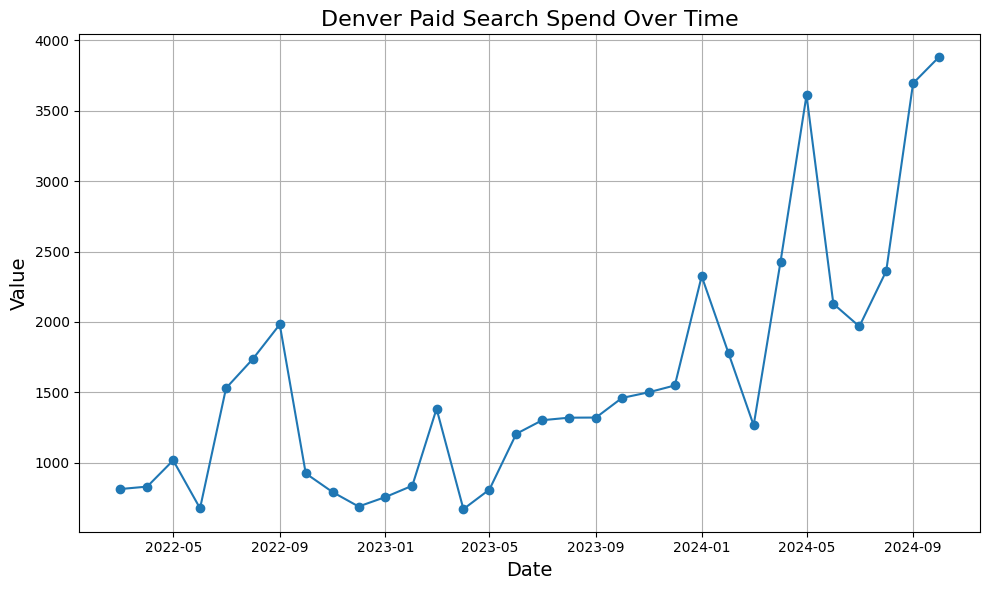

In [31]:

import matplotlib.pyplot as plt

df_series = df_final2.reset_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df_series['year_month'], df_series['SPEND'], marker='o')

# Customize the plot
plt.title(f'{MSA_MARKET} Paid Search Spend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig(fname = f'{MSA_MARKET} Paid Search Over Time')
# Show the plot
plt.show()

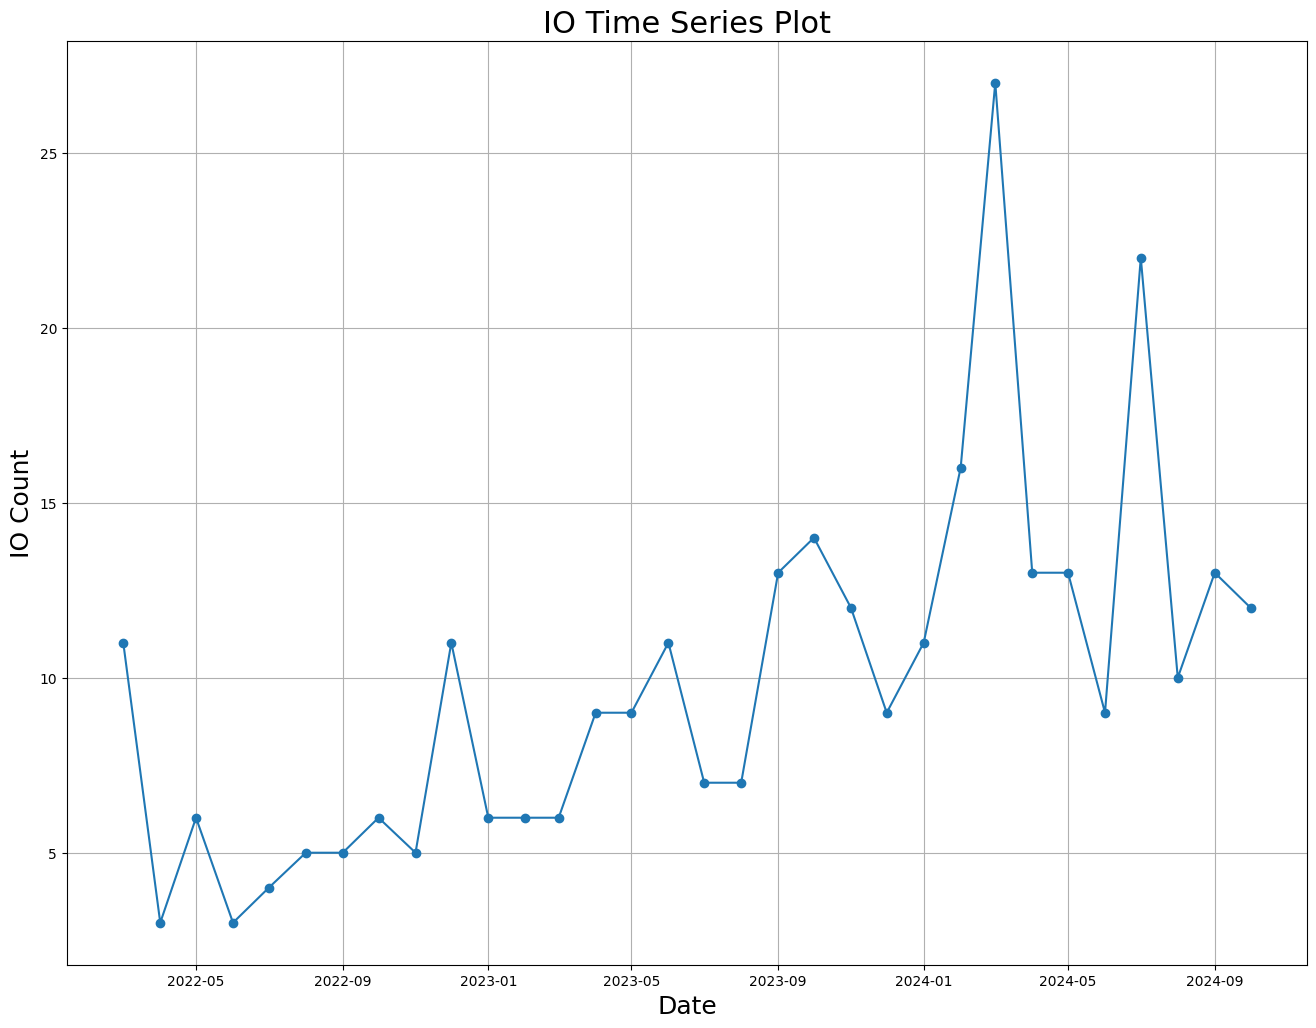

In [32]:
# Plot time series
#plt.plot(df_series['io_count'])


plt.figure(figsize=(16, 12))
plt.plot(df_series['year_month'], df_series['io_count'], marker='o')
plt.title('IO Time Series Plot', fontsize = 22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('IO Count', fontsize=18)
plt.grid(True)
plt.savefig(fname = f'{MSA_MARKET} IOs Over Time ')
plt.show()

In [33]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_series['io_count'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -0.7622016381873264
p-value: 0.8299737570157191


<Figure size 1000x600 with 0 Axes>

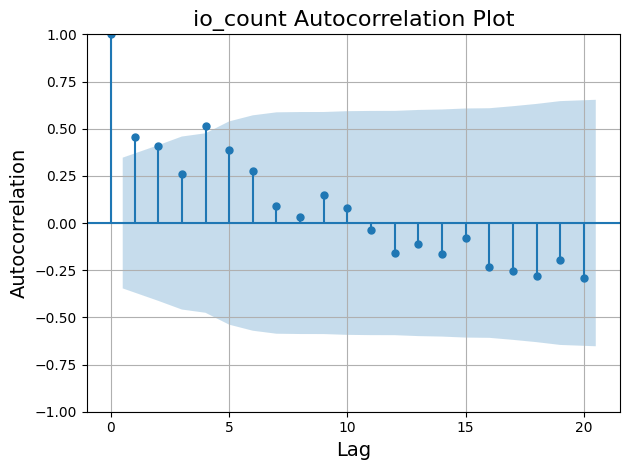

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot autocorrelation
plt.figure(figsize=(10, 6))
plot_acf(df_series['io_count'], lags=20)  # Specify number of lags
plt.title('io_count Autocorrelation Plot', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

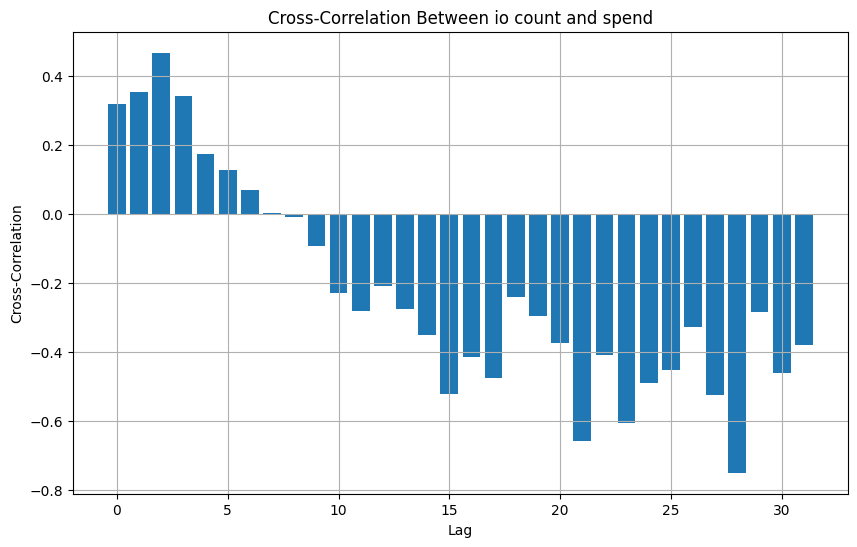

In [35]:
from statsmodels.tsa.stattools import ccf

# Compute cross-correlation between two features
cross_corr = ccf(df_series['io_count'], df_series['SPEND'])

# Plot the cross-correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(cross_corr)), cross_corr)
plt.title('Cross-Correlation Between io count and spend')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.grid()
plt.show()

In [36]:
#adding lags
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,11,False,9,3,362,812.89,1155,258
2022-04-01,3,False,10,4,204,830.13,1011,225
2022-05-01,6,False,11,5,191,1016.76,1036,253
2022-06-01,3,False,12,6,301,675.74,969,228
2022-07-01,4,False,13,7,5985,1529.64,902,229


In [37]:
k = 1
df_final3 = df_final2.copy()
df_final3['lag_SPEND'] = df_final3['SPEND'].shift(k)
df_final3['lag_direct_search_sum'] = df_final3['direct_search_sum'].shift(k)
df_final3['lag_IMPRESSIONS'] = df_final3['IMPRESSIONS'].shift(k)
df_final3['lag_io_count'] = df_final3['io_count'].shift(k)
df_final3 = df_final3.dropna()
df_final3.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS,lag_SPEND,lag_direct_search_sum,lag_IMPRESSIONS,lag_io_count
year_month,,,,,,,,,,,,
2022-04-01,3,False,10,4,204,830.13,1011,225,812.89,362.0,1155.0,11.0
2022-05-01,6,False,11,5,191,1016.76,1036,253,830.13,204.0,1011.0,3.0
2022-06-01,3,False,12,6,301,675.74,969,228,1016.76,191.0,1036.0,6.0
2022-07-01,4,False,13,7,5985,1529.64,902,229,675.74,301.0,969.0,3.0
2022-08-01,5,False,14,8,10496,1737.22,1021,249,1529.64,5985.0,902.0,4.0


In [38]:
df_final3.tail()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS,lag_SPEND,lag_direct_search_sum,lag_IMPRESSIONS,lag_io_count
year_month,,,,,,,,,,,,
2024-06-01,9,False,36,6,13081,2128.68,888,295,3610.99,15358.0,983.0,13.0
2024-07-01,22,False,37,7,13102,1968.08,739,296,2128.68,13081.0,888.0,9.0
2024-08-01,10,True,38,8,13092,2361.47,810,334,1968.08,13102.0,739.0,22.0
2024-09-01,13,True,39,9,14776,3695.31,1014,526,2361.47,13092.0,810.0,10.0
2024-10-01,12,True,40,10,13834,3882.69,917,366,3695.31,14776.0,1014.0,13.0


In [39]:
import causalpy as cp

seed=42
result4 = cp.InterruptedTimeSeries(
    data=df_final3,
    treatment_time=pd.Timestamp(intervention_date),
    formula="io_count ~ 1 + t + C(month) + SPEND + \
         + lag_io_count",
    model=cp.pymc_models.LinearRegression(sample_kwargs={"random_seed": seed}),
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


/Users/lmola/.pyenv/versions/3.11.7/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


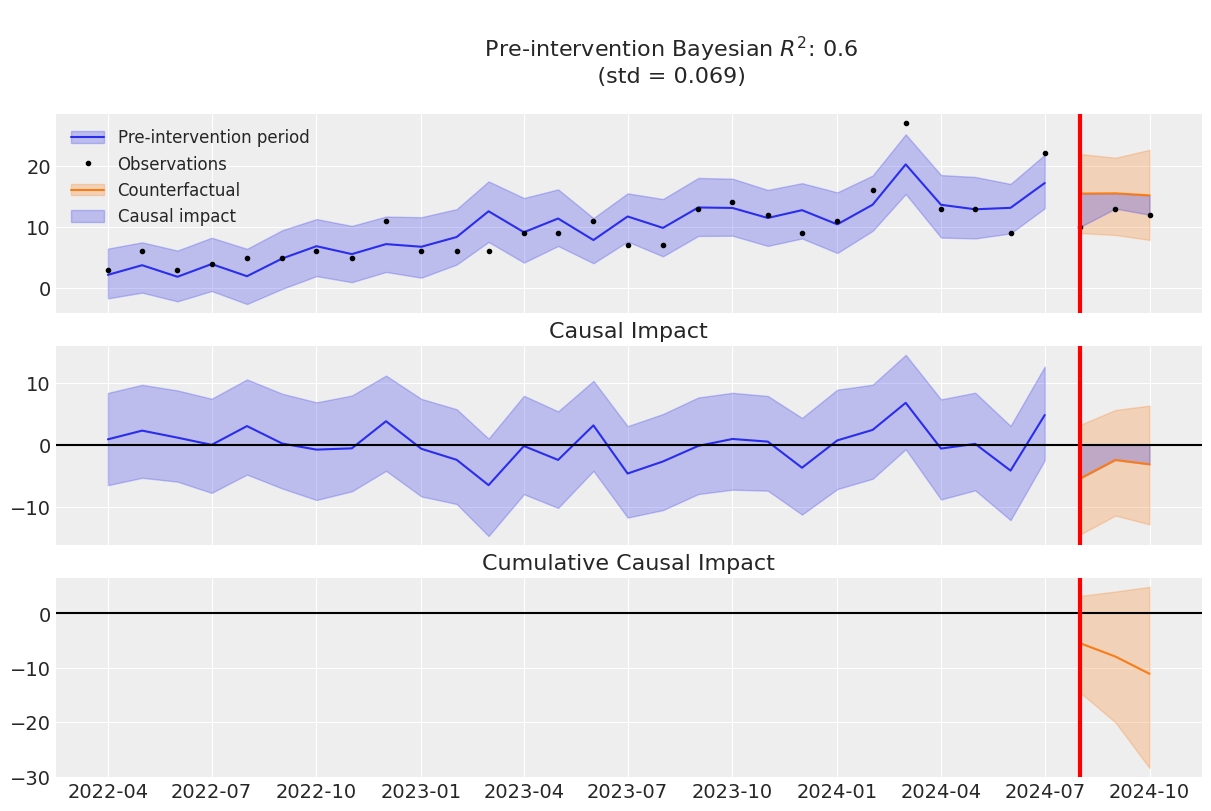

In [40]:
fig4, ax = result4.plot()

# Adjust the figure size
fig4.set_size_inches(12, 8)  # Example: Width = 12 inches, Height = 8 inches

In [41]:
import matplotlib.image as mpimg

import arviz as az

fig4.savefig(f"{MSA_MARKET}_causal_impact_plot.png")
plt.close()  # Close the figure to avoid overwriting
#print(f"Causal Graph for {MSA_MARKET} saved as {MSA_MARKET}_plot.png")
#plt.axis('off')  # Turn off axes for better visualization
# img = mpimg.imread(f"{MSA_MARKET}_plot.png")#
# plt.imshow(img)

In [42]:
# List all attributes and methods of the model object
print(dir(result4))

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_x_design_info', '_y_design_info', 'bayesian_plot', 'datapost', 'datapre', 'expt_type', 'formula', 'idata', 'input_validation', 'labels', 'model', 'ols_plot', 'outcome_variable_name', 'plot', 'post_X', 'post_impact', 'post_impact_cumulative', 'post_pred', 'post_y', 'pre_X', 'pre_impact', 'pre_pred', 'pre_y', 'print_coefficients', 'score', 'summary', 'supports_bayes', 'supports_ols', 'treatment_time']


In [43]:
#residuals = az.summary(result4.idata.posterior_predictive["obs"]) - df_final3["io_count"]

KeyError: "No variable named 'obs'. Variables on the dataset include ['chain', 'draw', 'obs_ind', 'y_hat']"

In [44]:
pre_pred_samples = result4.pre_pred.posterior_predictive["y_hat"]
print(pre_pred_samples)  # Check the structure

<xarray.DataArray 'y_hat' (chain: 4, draw: 1000, obs_ind: 28)> Size: 896kB
array([[[ 6.06760638,  4.79143394,  2.74587484, ...,  9.15386421,
         17.00297623, 18.92223272],
        [-1.65190667,  1.67277829, -0.11504051, ...,  7.97862441,
         19.59896462, 16.13545498],
        [ 3.07573771,  6.85991605,  2.06097747, ...,  7.88087966,
          6.43293856, 13.32827465],
        ...,
        [ 1.52061022,  6.82121373,  7.17378143, ..., 17.6011553 ,
         19.59638991, 20.42327267],
        [ 2.49009445,  7.00217499,  6.65222768, ...,  7.55292168,
         14.49526378, 12.62613388],
        [ 3.9550532 ,  4.8128627 ,  1.73320007, ..., 13.35909505,
         16.71046006, 16.80567711]],

       [[ 5.1961088 ,  8.66172869,  0.05949761, ..., 14.92766191,
          9.49610491, 17.77038327],
        [ 0.70023542,  2.99200584, -1.93590736, ..., 14.15237977,
         10.81993748, 15.53381975],
        [ 0.38456422,  4.08591925,  5.31223698, ..., 13.28540519,
         15.30852011, 25.300

In [45]:
# Compute the mean prediction across posterior samples
pre_pred_mean = pre_pred_samples.mean(dim="draw")
pre_pred_mean


<xarray.DataArray 'y_hat' (chain: 4, obs_ind: 28)> Size: 896B
array([[ 1.88913281,  3.63194958,  1.62242606,  4.18553297,  1.85645539,
         4.80494126,  6.91344515,  5.53526866,  7.39776592,  6.1690819 ,
         8.30451709, 12.50520966,  9.10296969, 11.37105094,  7.73063725,
        11.67150505,  9.65325865, 13.14326899, 13.07920154, 11.75598828,
        12.85624782,  9.94737736, 13.6244555 , 20.16297112, 13.903949  ,
        12.89011763, 13.23353297, 17.26741539],
       [ 2.28574162,  3.73905553,  1.84153349,  3.85779512,  1.94842868,
         4.84140905,  6.7531155 ,  5.65184873,  7.03633885,  6.78791781,
         8.54551847, 12.6390035 ,  9.28192728, 11.53223327,  7.89968905,
        11.60845547,  9.76678152, 12.93338102, 13.05549968, 11.49423901,
        12.55604763, 10.31933951, 13.60455664, 20.198114  , 13.41442013,
        12.85784254, 13.09842486, 17.20538678],
       [ 2.25561124,  3.74146791,  1.98294784,  4.14769558,  2.26205888,
         4.83066405,  6.68067515,  5.59800852,  7.24416351,  6.75774088,
         8.33039316, 12.57221862,  9.17542035, 11.35821861,  8.03954663,
        11.71354776,  9.55653459, 13.33310034, 13.03007147, 11.35858912,
        12.77503403, 10.54856069, 13.54723302, 20.17682256, 13.61162571,
        12.80965354, 13.27194339, 17.27594723],
       [ 2.08028249,  3.77732037,  1.99003005,  3.90154432,  1.88830904,
         4.78851183,  6.83438532,  5.57333218,  7.13728412,  6.92920114,
         8.59969058, 12.44740734,  9.30442466, 11.57935066,  7.84050695,
        11.65978615,  9.87647705, 13.35823851, 13.13438966, 11.39014909,
        12.71451547, 10.39374357, 13.64395578, 20.37430626, 13.55329469,
        12.9065711 , 13.1560749 , 17.06249858]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * obs_ind  (obs_ind) int64 224B 0 1 2 3 4 5 6 7 8 ... 20 21 22 23 24 25 26 27

In [46]:


az.summary(result4.post_impact.max("obs_ind"))
az.summary(result4.pre_pred.posterior_predictive["y_hat"].mean("obs_ind"))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
y_hat,9.543,0.88,7.941,11.243,0.014,0.01,4195.0,4016.0,1.0


In [47]:
az.summary(result4.post_impact.max("obs_ind"))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,0.289,3.817,-6.383,7.979,0.066,0.046,3384.0,3313.0,1.0


In [48]:
# get index of the final time point
index_4 = result4.post_impact_cumulative.obs_ind.max()
# grab the posterior distribution of the cumulative impact at this final time point
last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# get summary stats
az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,-11.11,8.937,-25.151,3.67,0.147,0.109,3697.0,3509.0,1.0


In [49]:
from scipy.stats import norm

# Inputs
estimate = 56.046
lower_ci = 19.697
upper_ci = 93.348
z_critical = 1.645  # For a 90% confidence interval

# Calculate standard error
se = (upper_ci - lower_ci) / (2 * z_critical)

# Calculate z-score
z_score = estimate / se

# Calculate p-value
p_value = 2 * norm.sf(abs(z_score))
print(f"p-value: {p_value:.4f}")

p-value: 0.0123


In [50]:
# # get index of the final time point
# index_4 = result4.post_impact_cumulative.obs_ind.max()
# # grab the posterior distribution of the cumulative impact at this final time point
# last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# # get summary stats
# az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

In [51]:
df_series.tail()

,year_month,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
27,2024-06-01,9,False,36,6,13081,2128.68,888,295
28,2024-07-01,22,False,37,7,13102,1968.08,739,296
29,2024-08-01,10,True,38,8,13092,2361.47,810,334
30,2024-09-01,13,True,39,9,14776,3695.31,1014,526
31,2024-10-01,12,True,40,10,13834,3882.69,917,366


In [52]:
#number of intervention periods
int_periods = df_series['intervention'].sum()

#rows with intervention
intervention_df = df_series.tail(int_periods)

int_dates = intervention_df[['year_month', 'io_count']].reset_index(drop=True)
int_dates['treatment_region'] = MSA_MARKET
# Add a column with the index number
int_dates['Index_Number'] = int_dates.index

int_dates.head()

,year_month,io_count,treatment_region,Index_Number
0,2024-08-01,10,Denver,0
1,2024-09-01,13,Denver,1
2,2024-10-01,12,Denver,2


In [53]:
int_dates.iloc[0][0]

/var/folders/sb/n8yqrs6n7y9ghs7jf_2n7h280000gp/T/ipykernel_4070/3285902388.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  int_dates.iloc[0][0]


Timestamp('2024-08-01 00:00:00')

In [54]:
for i in range(int_periods):
    if i ==0:
        az_df = pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}), hdi_prob=0.9))
    else:

        # Concatenate the row to the DataFrame
        #df = pd.concat([df, new_row], ignore_index=True)
        new_row = pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}), hdi_prob = 0.9))
        az_df = pd.concat([az_df, new_row], ignore_index=True)
        #az_df.concat(pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}))))

az_df['Index_Number'] = az_df.index
az_df['bayes_Stat_Sig'] = (~((az_df['hdi_5%'] < 0 )| (az_df['hdi_95%'] < 0)))
az_df.head()

az_join = pd.merge(int_dates, az_df, on = 'Index_Number', how = 'inner')
az_join['counter_io_count'] = az_join['io_count'] - az_join['mean']
az_join['perc_lift'] = round((az_join['io_count'] - az_join['counter_io_count'])/az_join['counter_io_count'], 4)

az_final = az_join[['Index_Number', 'year_month', 'treatment_region', 'io_count', \
    'counter_io_count', 'mean', 'sd','perc_lift', 'bayes_Stat_Sig', 'hdi_5%', 'hdi_95%','mcse_mean', 'mcse_sd' ]]

az_final =az_final.rename(columns = {'mean': 'bayes_uplift'})
az_final.head()


,Index_Number,year_month,treatment_region,io_count,counter_io_count,bayes_uplift,sd,perc_lift,bayes_Stat_Sig,hdi_5%,hdi_95%,mcse_mean,mcse_sd
0,0,2024-08-01,Denver,10,15.473,-5.473,4.777,-0.3537,False,-12.716,2.845,0.080,0.058
1,1,2024-09-01,Denver,13,15.465,-2.465,4.647,-0.1594,False,-9.677,5.454,0.075,0.056
2,2,2024-10-01,Denver,12,15.173,-3.173,5.091,-0.2091,False,-11.347,5.535,0.090,0.065


In [55]:
# Save with the index column
az_final.to_csv(f"{MSA_MARKET}_monthly_uplift.csv", index=True)

In [56]:
# get index of the final time point
index_4 = result4.post_impact_cumulative.obs_ind.max()
# grab the posterior distribution of the cumulative impact at this final time point
last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# get summary stats
az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

az_cumulative = az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

In [57]:
int_dates

,year_month,io_count,treatment_region,Index_Number
0,2024-08-01,10,Denver,0
1,2024-09-01,13,Denver,1
2,2024-10-01,12,Denver,2


In [58]:
result = int_dates.agg(
    treatment_start = ("year_month", "min"),
    treatment_end = ("year_month", "max"),
    io_sum = ("io_count", "sum")
).reset_index()

In [59]:
result

,index,year_month,io_count
0,treatment_start,2024-08-01,NaN
1,treatment_end,2024-10-01,NaN
2,io_sum,NaT,35.0


In [60]:
int_dates['io_count'].sum()

35

In [61]:
az_cumulative.head()

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,-11.11,8.937,-25.151,3.67,0.147,0.109,3697.0,3509.0,1.0


In [62]:
#adjust the cumulative table

#az_cumulative['Index_Number'] = az_df.index
az_cumulative['bayes_Stat_Sig'] = (~((az_cumulative['hdi_5%'] < 0 )| (az_cumulative['hdi_95%'] < 0)))
#az_cumulative.head()
az_cumulative['io_sum'] = int_dates['io_count'].sum()
az_cumulative['counter_io_sum'] = az_final['counter_io_count'].sum()
az_cumulative['treatment_region'] = MSA_MARKET
az_cumulative['treatment_start'] = int_dates['year_month'].min()
az_cumulative['treatment_end'] = int_dates['year_month'].max()
#az_cumulative_join = pd.merge(az_cumulative_final, az_cumulative, on = 'Index_Number', how = 'inner')

#az_cumulative['counter_io_count'] = az_cumulative_join['io_count'] - az_join['mean']
az_cumulative['perc_lift'] = round((az_cumulative['io_sum'] - \
    az_cumulative['counter_io_sum'])/az_cumulative['counter_io_sum'], 4)

az_cumulative_final = az_cumulative[['treatment_region', 'treatment_start', 'treatment_end', \
    'io_sum', 'counter_io_sum', 'mean', 'sd','perc_lift', 'bayes_Stat_Sig', 'hdi_5%', 'hdi_95%','mcse_mean', 'mcse_sd' ]]

az_cumulative_final =az_cumulative_final.rename(columns = {'mean': 'bayes_uplift'})
az_cumulative_final.head()

,treatment_region,treatment_start,treatment_end,io_sum,counter_io_sum,bayes_uplift,sd,perc_lift,bayes_Stat_Sig,hdi_5%,hdi_95%,mcse_mean,mcse_sd
x,Denver,2024-08-01,2024-10-01,35,46.111,-11.11,8.937,-0.241,False,-25.151,3.67,0.147,0.109


In [63]:
# Save with the index column
az_cumulative_final.to_csv(f"{MSA_MARKET}_cumulative_uplift.csv", index=True)